In [109]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.ndimage import label

plt.rcParams.update({'font.size': 12})

In [210]:
def calculate_energy(spin_matrix, J=1, H=0):
    """
    Calculate the energy of the Ising model for a given spin configuration.
    
    Parameters:
    - spin_matrix: 2D numpy array representing the spin configuration
    - J: Coupling constant (default is 1)
    
    Returns:
    - Energy of the spin configuration
    """
    N = spin_matrix.shape[0]
    energy = 0

    for i in range(N):
        for j in range(N):
            neighbor_sum = (
                spin_matrix[i, (j + 1) % N] +  # right neighbor
                spin_matrix[i, (j - 1) % N] +  # left neighbor
                spin_matrix[(i + 1) % N, j] +  # bottom neighbor
                spin_matrix[(i - 1) % N, j]    # top neighbor
            )
            # Divide spin-spin interaction energy by 2 becouse of duble counting
            energy += -J * spin_matrix[i, j] * neighbor_sum / 2. - H * spin_matrix[i, j]

    return energy


def count_domains(spin_matrix):
    """
    Count the number of domains in the spin configuration.

    Parameters:
    - spin_matrix: 2D numpy array representing the spin configuration

    Returns:
    - Number of domains
    """
    labeled_spins_up, num_up_domains = label(np.where(spin_matrix == -1, 0, 1))
    labeled_spins_down, num_down_domains = label(np.where(spin_matrix == 1, 0, 1))
    return num_up_domains + num_down_domains


def calculate_susceptibility(spin_matrix, kBT):
    """
    Calculate the susceptibility of the spin configuration.

    Parameters:
    - spin_matrix: 2D numpy array representing the spin configuration
    - kBT: kBT of the system

    Returns:
    - Susceptibility
    """
    magnetization = np.sum(spin_matrix)
    magnetization_squared = np.sum(spin_matrix ** 2)

    average_magnetization = np.abs(magnetization) / spin_matrix.size
    average_magnetization_squared = magnetization_squared / spin_matrix.size

    susceptibility = (average_magnetization_squared - average_magnetization ** 2) / kBT
    return susceptibility


def ising_model(num_iter, N, kBT, J=1, H=0):
    # configurations = np.zeros((num_iter, N, N))
    # configurations[0] = np.random.choice([-1, 1], size=(N, N)) # Zacetno stanje

    configuration = np.random.choice([-1, 1], size=(N, N)) # Zacetno stanje
    configuration = start_config
    
    Es = np.zeros(num_iter)
    num_domains = np.zeros(num_iter)
    mag = np.zeros(num_iter)
    num_accepted = 0.

    Es[0] = calculate_energy(configuration)
    num_domains[0] = count_domains(configuration)
    mag[0] = np.sum(configuration)

    for i in range(1, num_iter):
        E_old = Es[i-1]
        old_configuration = configuration

        j, k = np.random.randint(0, N, 2)
        possible_new_configuration = old_configuration.copy()
        possible_new_configuration[j, k] = -possible_new_configuration[j, k]

        del_E = -2 * J * possible_new_configuration[j, k] * (possible_new_configuration[(j - 1) % N, k] + 
                                                            possible_new_configuration[(j + 1) % N, k] + 
                                                            possible_new_configuration[j, (k - 1) % N] + 
                                                            possible_new_configuration[j, (k + 1) % N]) - 2 * H * possible_new_configuration[j, k]
        
        if del_E < 0:
            configuration = possible_new_configuration
            Es[i] = E_old + del_E
            num_domains[i] = count_domains(configuration)
            mag[i] = np.sum(configuration)
            num_accepted += 1
        
        else:
            ksi = np.random.rand()
            if ksi < np.exp(-del_E/kBT):
                configuration = possible_new_configuration
                Es[i] = E_old + del_E
                num_domains[i] = count_domains(configuration)
                mag[i] = np.sum(configuration)
                num_accepted += 1
            else:
                configuration = old_configuration
                Es[i] = E_old
                num_domains[i] = count_domains(configuration)
                mag[i] = np.sum(configuration)
            
    return configuration, Es, num_domains, mag, float(num_accepted)/float(num_iter)

In [207]:
N = 80 # Velikost mreže
num_iter = 200000
steps = np.arange(0, num_iter)
kBTs = [1., 2.269185, 3.]

In [208]:
configurations0, Es0, num_domains0, accepted_ratio0 = ising_model(num_iter=num_iter, N=N, kBT=kBTs[0])
print('1')
configurations1, Es1, num_domains1, accepted_ratio1 = ising_model(num_iter=num_iter, N=N, kBT=kBTs[1])
print('1')
configurations2, Es2, num_domains2, accepted_ratio2 = ising_model(num_iter=num_iter, N=N, kBT=kBTs[2])
print('1')

1
1
1


In [199]:
# start_config = configurations1.copy()

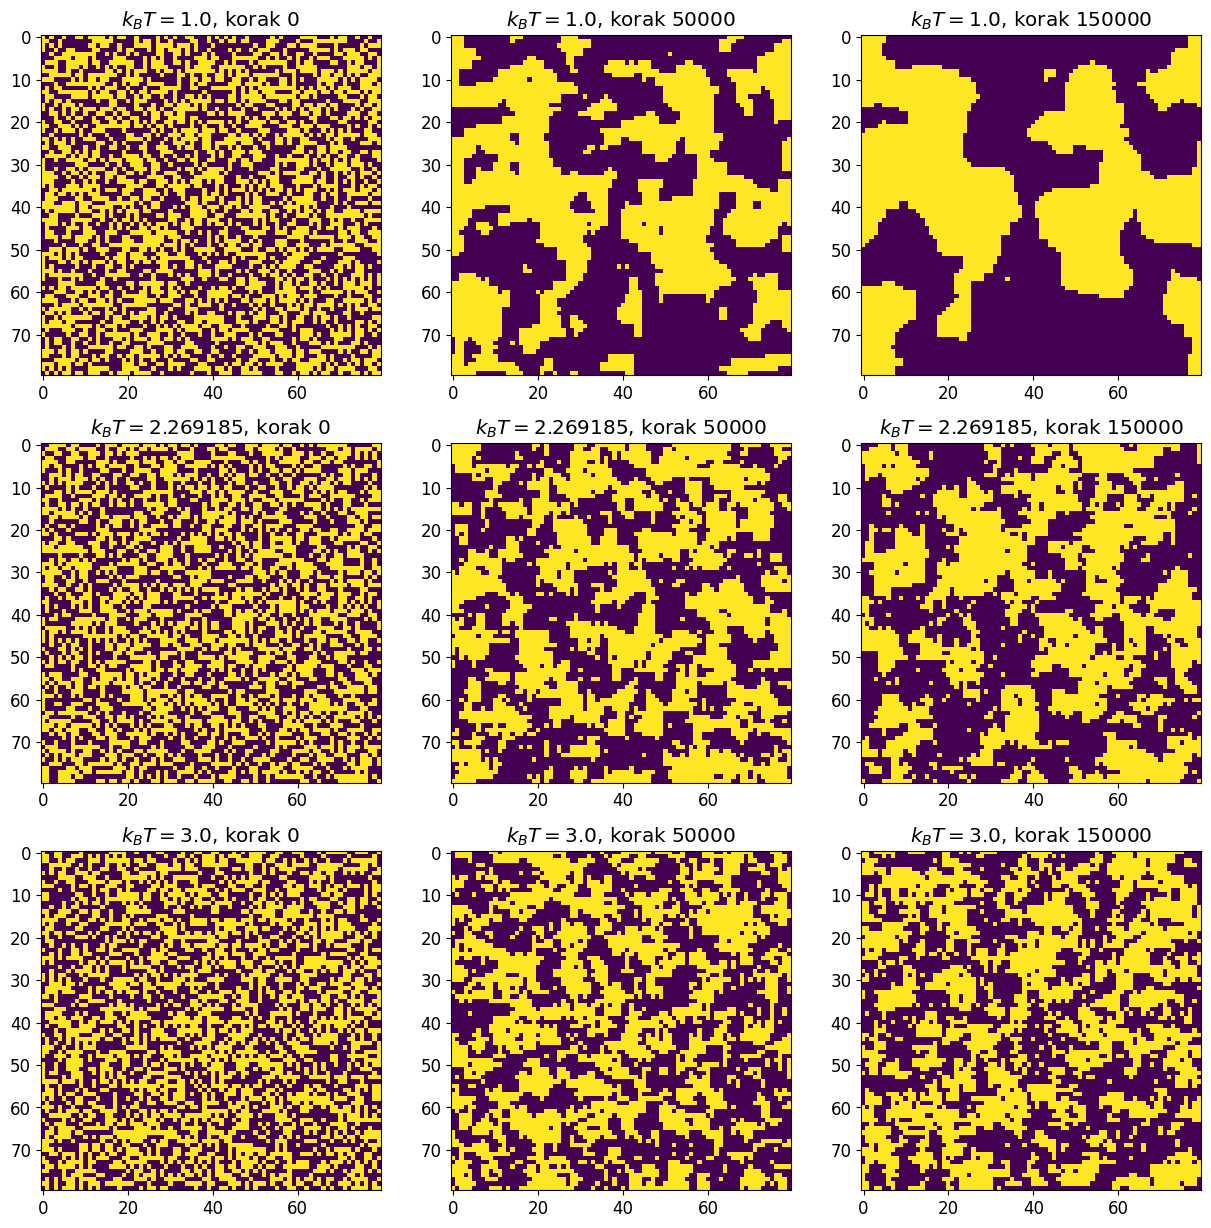

In [158]:
fig = plt.figure(figsize=(15, 15))
n = 5

ax00 = fig.add_subplot(3, 3, 1)
ax00.set_title(r'$k_BT = $' + f'{kBTs[0]}, korak 0')
ax00.imshow(configurations0[0])

ax01 = fig.add_subplot(3, 3, 2)
ax01.set_title(r'$k_BT = $' + f'{kBTs[0]}, korak {int(len(configurations0)/3)}')
ax01.imshow(configurations0[int(len(configurations0)/3)])


ax02 = fig.add_subplot(3, 3, 3)
ax02.set_title(r'$k_BT = $' + f'{kBTs[0]}, korak {int(len(configurations0))}')
ax02.imshow(configurations0[-1])


ax10 = fig.add_subplot(3, 3, 4)
ax10.set_title(r'$k_BT = $' + f'{kBTs[1]}, korak 0')
ax10.imshow(configurations1[0])

ax11 = fig.add_subplot(3, 3, 5)
ax11.set_title(r'$k_BT = $' + f'{kBTs[1]}, korak {int(len(configurations1)/3)}')
ax11.imshow(configurations1[int(len(configurations1)/3)])


ax12 = fig.add_subplot(3, 3, 6)
ax12.set_title(r'$k_BT = $' + f'{kBTs[1]}, korak {int(len(configurations1))}')
ax12.imshow(configurations1[-1])


ax20 = fig.add_subplot(3, 3, 7)
ax20.set_title(r'$k_BT = $' + f'{kBTs[2]}, korak 0')
ax20.imshow(configurations2[0])

ax21 = fig.add_subplot(3, 3, 8)
ax21.set_title(r'$k_BT = $' + f'{kBTs[2]}, korak {int(len(configurations2)/3)}')
ax21.imshow(configurations2[int(len(configurations2)/3)])


ax22 = fig.add_subplot(3, 3, 9)
ax22.set_title(r'$k_BT = $' + f'{kBTs[2]}, korak {int(len(configurations2))}')
ax22.imshow(configurations2[-1])

- energija

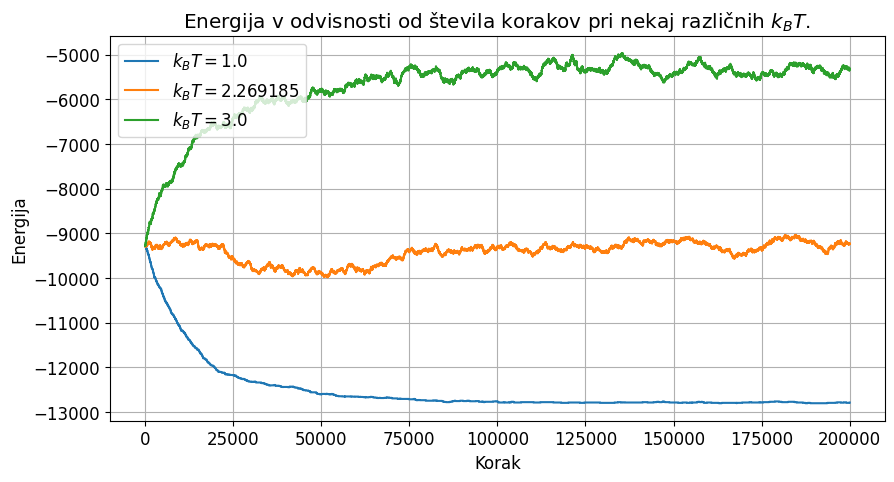

In [209]:
fig = plt.figure(figsize=(10, 5))
n = 5

ax0 = fig.add_subplot(1, 1, 1)
ax0.set_title(r'Energija v odvisnosti od števila korakov pri nekaj različnih $k_BT$.')
ax0.set_xlabel('Korak')
ax0.set_ylabel('Energija')
ax0.plot(steps, Es0, label=r'$k_BT =$' + f'{kBTs[0]}')
ax0.plot(steps, Es1, label=r'$k_BT =$' + f'{kBTs[1]}')
ax0.plot(steps, Es2, label=r'$k_BT =$' + f'{kBTs[2]}')
ax0.grid()
ax0.legend()

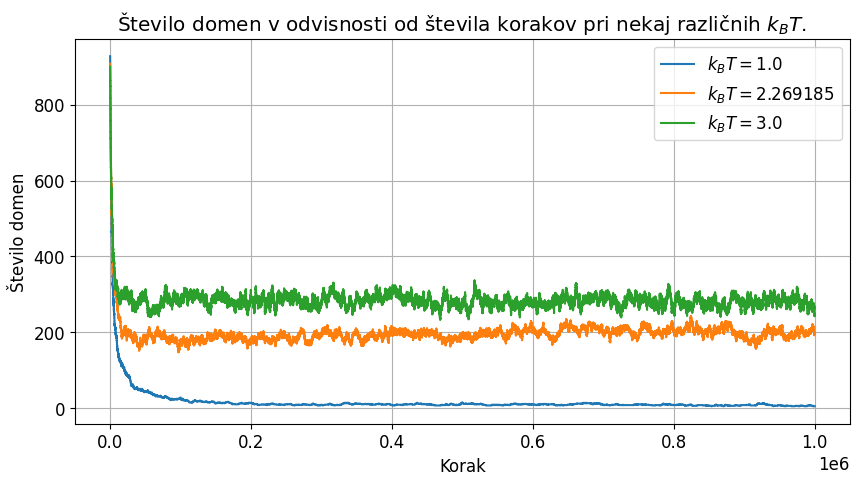

In [189]:
fig = plt.figure(figsize=(10, 5))
n = 5

ax0 = fig.add_subplot(1, 1, 1)
ax0.set_title(r'Število domen v odvisnosti od števila korakov pri nekaj različnih $k_BT$.')
ax0.set_xlabel('Korak')
ax0.set_ylabel('Število domen')
ax0.plot(steps, num_domains0, label=r'$k_BT =$' + f'{kBTs[0]}', alpha=1)
ax0.plot(steps, num_domains1, label=r'$k_BT =$' + f'{kBTs[1]}', alpha=1)
ax0.plot(steps, num_domains2, label=r'$k_BT =$' + f'{kBTs[2]}', alpha=1)
ax0.grid()
ax0.legend()

In [211]:
N = 80 # Velikost mreže
num_iter = 200000
kBTs = np.arange(1, 3, 0.1)
print(kBTs)

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]


In [214]:
avg_E = np.zeros_like(kBTs)
std_E = np.zeros_like(kBTs)
avg_mag = np.zeros_like(kBTs)
std_mag = np.zeros_like(kBTs)
avg_num_domains = np.zeros_like(kBTs)
std_num_domains = np.zeros_like(kBTs)

for i, kBT in enumerate(kBTs):
    print(i/len(kBTs))
    conf, Es, num_domains, mag, ratio = ising_model(num_iter=num_iter, N=N, kBT=kBT)
    avg_E[i] = np.average(Es[100000:])
    std_E[i] = np.std(Es[100000:])
    avg_mag[i] = np.average(mag[100000:])
    std_mag[i] = np.std(mag[100000:])
    avg_num_domains[i] = np.average(num_domains[100000:])
    std_num_domains[i] = np.std(num_domains[100000:])

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


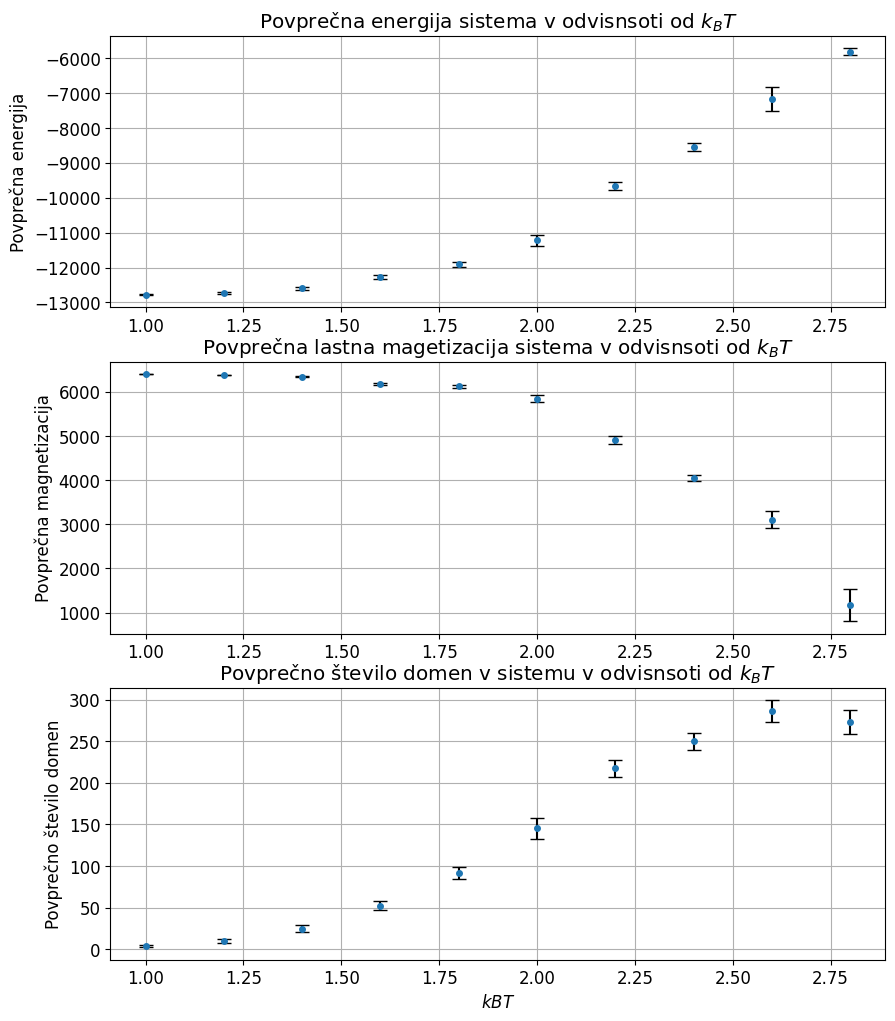

In [218]:
fig = plt.figure(figsize=(10, 12))

ax0 = fig.add_subplot(3, 1, 1)
ax0.set_title(r'Povprečna energija sistema v odvisnsoti od $k_BT$')
ax0.errorbar(kBTs, avg_E, yerr=std_E, fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black')
ax0.set_ylabel('Povprečna energija')
ax0.grid()

ax1 = fig.add_subplot(3, 1, 2)
ax1.set_title(r'Povprečna lastna magetizacija sistema v odvisnsoti od $k_BT$')
ax1.errorbar(kBTs, avg_mag, yerr=std_mag, fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black')
ax1.set_ylabel('Povprečna magnetizacija')
ax1.grid()

ax2 = fig.add_subplot(3, 1, 3)
ax2.set_title(r'Povprečno število domen v sistemu v odvisnsoti od $k_BT$')
ax2.errorbar(kBTs, avg_num_domains, yerr=std_num_domains, fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black')
ax2.set_ylabel('Povprečno število domen')
ax2.set_xlabel(r'$kBT$')
ax2.grid()

In [240]:
N = 80 # Velikost mreže
num_iter = 200000
kBTs = np.linspace(0.1, 7, 10)
Hs = np.array([0., 0.1, 0.2, 0.3])
print(kBTs)

[0.1        0.86666667 1.63333333 2.4        3.16666667 3.93333333
 4.7        5.46666667 6.23333333 7.        ]


In [241]:
avg_E = np.zeros((len(Hs), len(kBTs)))
std_E = np.zeros_like(avg_E)
avg_mag = np.zeros_like(avg_E)
std_mag = np.zeros_like(avg_E)
avg_num_domains = np.zeros_like(avg_E)
std_num_domains = np.zeros_like(avg_E)
ratios = np.zeros_like(avg_E)
chi = np.zeros_like(avg_E)
c = np.zeros_like(avg_E)

for i, H in enumerate(Hs):
    print(i/len(Hs))

    for j, kBT in enumerate(kBTs):
        
        conf, Es, num_domains, mag, ratio = ising_model(num_iter=num_iter, N=N, kBT=kBT, H=H)
        avg_E[i][j] = np.average(Es[100000:])
        std_E[i][j] = np.std(Es[100000:])
        avg_mag[i][j] = np.average(mag[100000:])
        std_mag[i][j] = np.std(mag[100000:])
        avg_num_domains[i][j] = np.average(num_domains[100000:])
        std_num_domains[i][j] = np.std(num_domains[100000:])
        
        # Calculate susceptibility and specific heat
        chi[i][j] = np.var(mag[100000:]) / (N * kBT)
        c[i][j] = np.var(Es[100000:]) / (N * kBT**2)
        
        ratios[i][j] = ratio


0.0
0.25
0.5
0.75


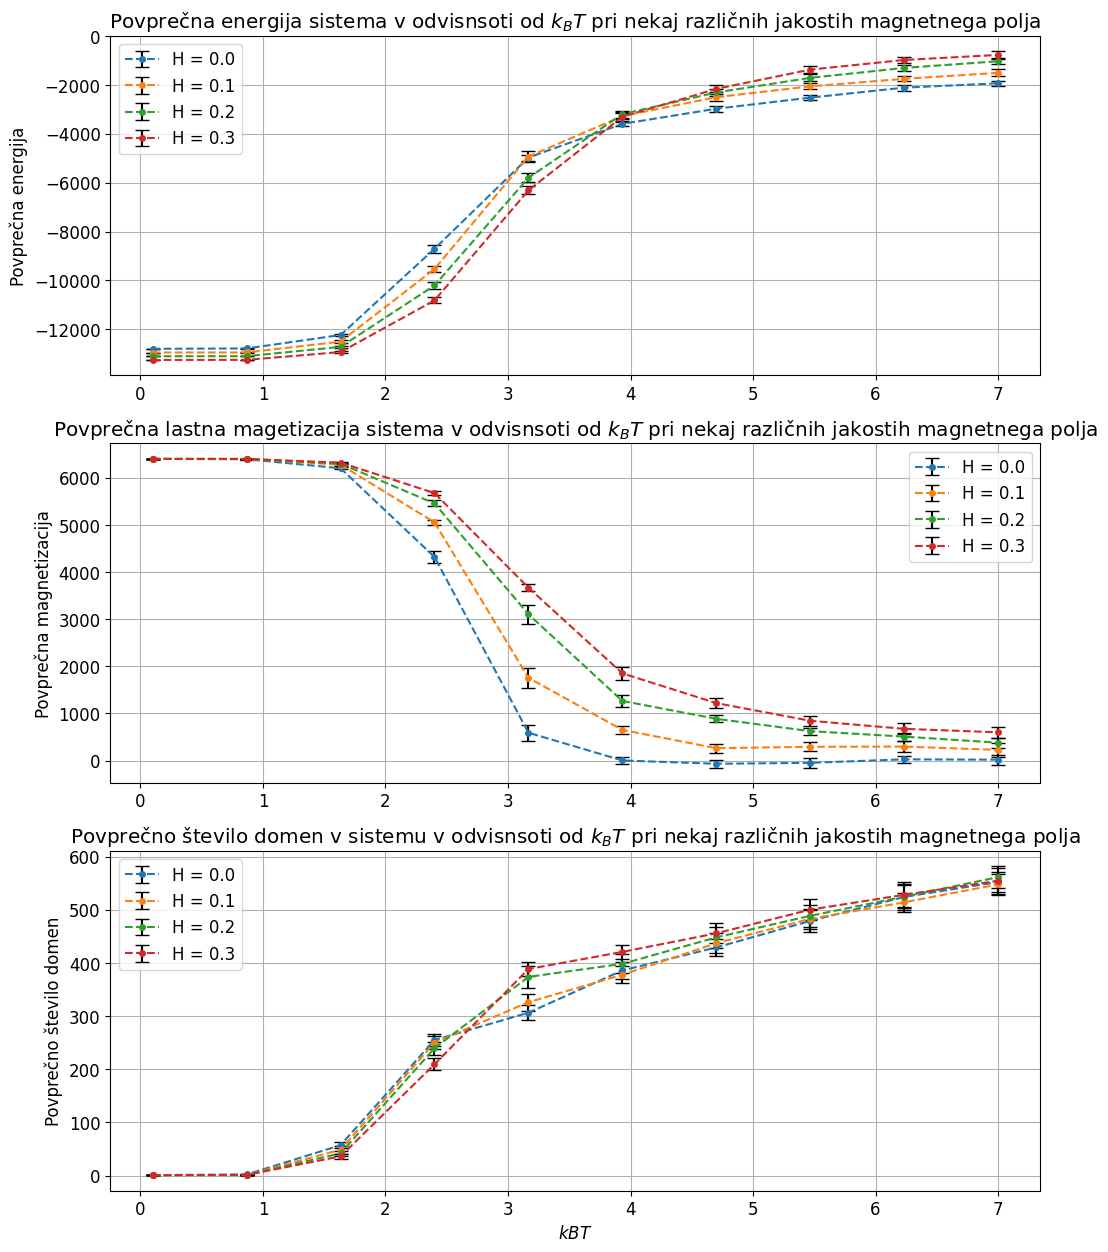

In [247]:
fig = plt.figure(figsize=(12, 15))

ax0 = fig.add_subplot(3, 1, 1)
ax0.set_title(r'Povprečna energija sistema v odvisnsoti od $k_BT$ pri nekaj različnih jakostih magnetnega polja')
ax0.errorbar(kBTs, avg_E[0], yerr=std_E[0], fmt='.', ls='--', markersize=8, capsize=5, barsabove=False, ecolor='black', label=f'H = {Hs[0]}')
ax0.errorbar(kBTs, avg_E[1], yerr=std_E[1], fmt='.', ls='--', markersize=8, capsize=5, barsabove=False, ecolor='black', label=f'H = {Hs[1]}')
ax0.errorbar(kBTs, avg_E[2], yerr=std_E[2], fmt='.', ls='--', markersize=8, capsize=5, barsabove=False, ecolor='black', label=f'H = {Hs[2]}')
ax0.errorbar(kBTs, avg_E[3], yerr=std_E[3], fmt='.', ls='--', markersize=8, capsize=5, barsabove=False, ecolor='black', label=f'H = {Hs[3]}')
ax0.legend()
ax0.set_ylabel('Povprečna energija')
ax0.grid()

ax1 = fig.add_subplot(3, 1, 2)
ax1.set_title(r'Povprečna lastna magetizacija sistema v odvisnsoti od $k_BT$ pri nekaj različnih jakostih magnetnega polja')
ax1.errorbar(kBTs, avg_mag[0], yerr=std_mag[0], fmt='.', ls='--', markersize=8, capsize=5, barsabove=False, ecolor='black', label=f'H = {Hs[0]}')
ax1.errorbar(kBTs, avg_mag[1], yerr=std_mag[1], fmt='.', ls='--', markersize=8, capsize=5, barsabove=False, ecolor='black', label=f'H = {Hs[1]}')
ax1.errorbar(kBTs, avg_mag[2], yerr=std_mag[2], fmt='.', ls='--', markersize=8, capsize=5, barsabove=False, ecolor='black', label=f'H = {Hs[2]}')
ax1.errorbar(kBTs, avg_mag[3], yerr=std_mag[3], fmt='.', ls='--', markersize=8, capsize=5, barsabove=False, ecolor='black', label=f'H = {Hs[3]}')
ax1.legend()
ax1.set_ylabel('Povprečna magnetizacija')
ax1.grid()

ax2 = fig.add_subplot(3, 1, 3)
ax2.set_title(r'Povprečno število domen v sistemu v odvisnsoti od $k_BT$ pri nekaj različnih jakostih magnetnega polja')
ax2.errorbar(kBTs, avg_num_domains[0], yerr=std_num_domains[0], fmt='.', ls='--', markersize=8, capsize=5, barsabove=False, ecolor='black', label=f'H = {Hs[0]}')
ax2.errorbar(kBTs, avg_num_domains[1], yerr=std_num_domains[1], fmt='.', ls='--', markersize=8, capsize=5, barsabove=False, ecolor='black', label=f'H = {Hs[1]}')
ax2.errorbar(kBTs, avg_num_domains[2], yerr=std_num_domains[2], fmt='.', ls='--', markersize=8, capsize=5, barsabove=False, ecolor='black', label=f'H = {Hs[2]}')
ax2.errorbar(kBTs, avg_num_domains[3], yerr=std_num_domains[3], fmt='.', ls='--', markersize=8, capsize=5, barsabove=False, ecolor='black', label=f'H = {Hs[3]}')
ax2.legend()
ax2.set_ylabel('Povprečno število domen')
ax2.set_xlabel(r'$kBT$')
ax2.grid()

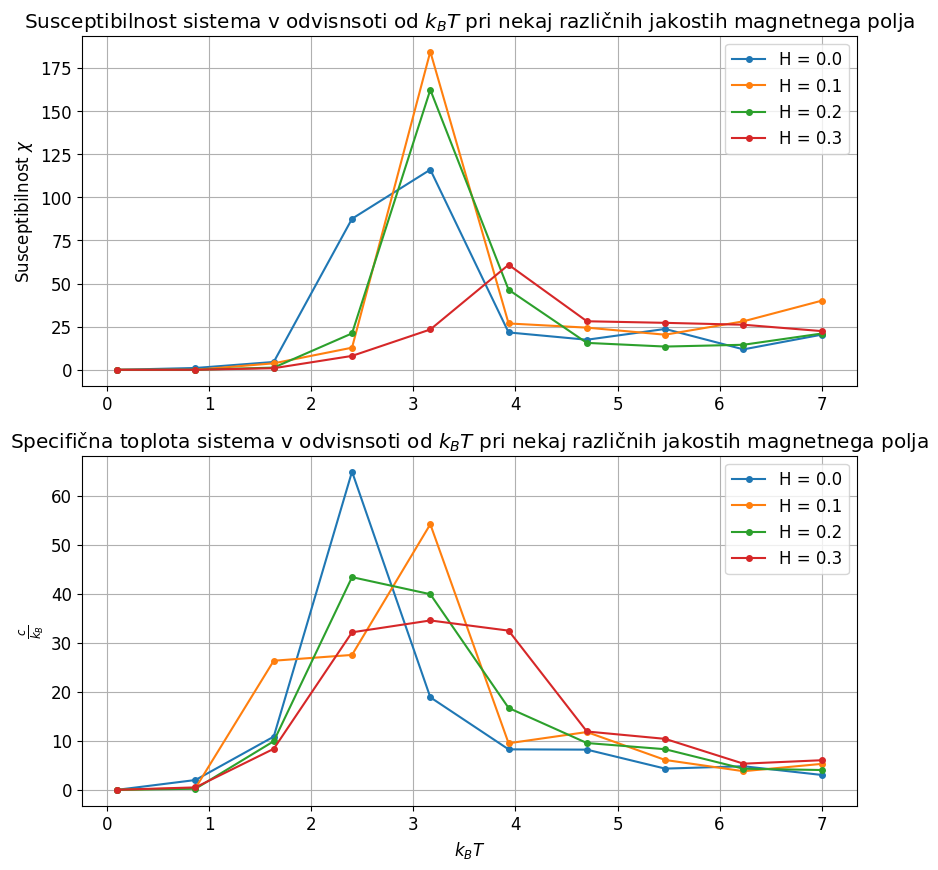

In [248]:
fig = plt.figure(figsize=(10,10))

ax0 = fig.add_subplot(2, 1, 1)
ax0.set_title(r'Susceptibilnost sistema v odvisnsoti od $k_BT$ pri nekaj različnih jakostih magnetnega polja')
ax0.plot(kBTs, chi[0], marker='.', markersize=8, label=f'H = {Hs[0]}')
ax0.plot(kBTs, chi[1], marker='.', markersize=8, label=f'H = {Hs[1]}')
ax0.plot(kBTs, chi[2], marker='.', markersize=8, label=f'H = {Hs[2]}')
ax0.plot(kBTs, chi[3], marker='.', markersize=8, label=f'H = {Hs[3]}')
ax0.legend()
ax0.set_ylabel(r'Susceptibilnost $\chi$')
ax0.grid()

ax1 = fig.add_subplot(2, 1, 2)
ax1.set_title(r'Specifična toplota sistema v odvisnsoti od $k_BT$ pri nekaj različnih jakostih magnetnega polja')
ax1.plot(kBTs, c[0], marker='.', markersize=8, label=f'H = {Hs[0]}')
ax1.plot(kBTs, c[1], marker='.', markersize=8, label=f'H = {Hs[1]}')
ax1.plot(kBTs, c[2], marker='.', markersize=8, label=f'H = {Hs[2]}')
ax1.plot(kBTs, c[3], marker='.', markersize=8, label=f'H = {Hs[3]}')
ax1.legend()
ax1.set_ylabel(r'$\frac{c}{k_B}$')
ax1.set_xlabel(r'$k_BT$')
ax1.grid()

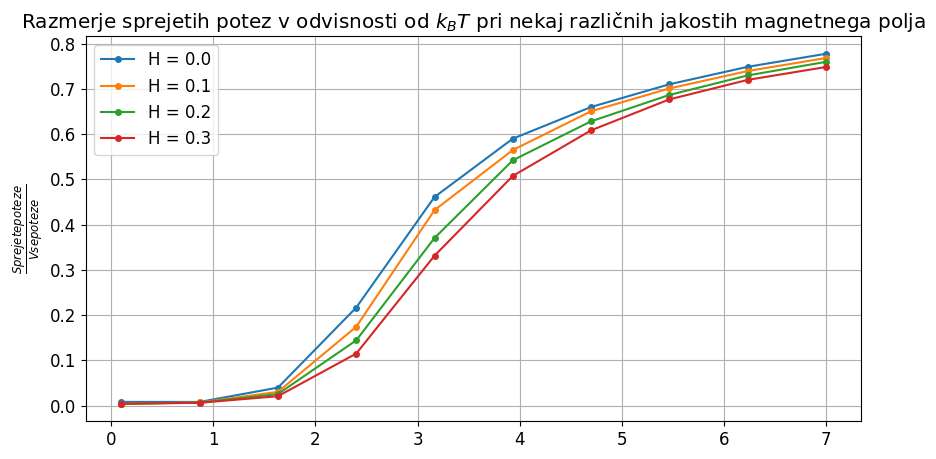

In [245]:
fig = plt.figure(figsize=(10,5))

ax0 = fig.add_subplot(1, 1, 1)
ax0.set_title(r'Razmerje sprejetih potez v odvisnosti od $k_BT$ pri nekaj različnih jakostih magnetnega polja')
ax0.plot(kBTs, ratios[0], marker='.', markersize=8, label=f'H = {Hs[0]}')
ax0.plot(kBTs, ratios[1], marker='.', markersize=8, label=f'H = {Hs[1]}')
ax0.plot(kBTs, ratios[2], marker='.', markersize=8, label=f'H = {Hs[2]}')
ax0.plot(kBTs, ratios[3], marker='.', markersize=8, label=f'H = {Hs[3]}')
ax0.legend()
ax0.set_ylabel(r'$\frac{Sprejete poteze}{Vse poteze}$')
ax0.grid()